In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import numpy as np

In [2]:
path_out = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/filter_summary_file.txt'

In [3]:
df = pd.read_csv(path_out, sep= '\t')

In [4]:
df.head()


,sample,mutation_mode,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortNormal,Filter_Sample_Cohort_CohortNormal_Uniprot
0,TCGA-AO-A0JM-01A-21R-A056-07.all,ref,2.0,1,1.0,1,GTEXcore,0.0,5161569,1386315,1385555,89250,89068
1,TCGA-AO-A0JM-01A-21R-A056-07.all,ref,2.0,1,1.0,10,GTEXcore,0.0,5161569,1386315,1385555,19966,19944
2,TCGA-AO-A0JM-01A-21R-A056-07.all,ref,2.0,1,1.0,2,GTEXcore,10.0,5161569,1386315,1385555,22665,22638
3,TCGA-AO-A0JM-01A-21R-A056-07.all,ref,2.0,1,1.0,10,GTEXcore,3.0,5161569,1386315,1385555,21348,21323
4,TCGA-AO-A0JM-01A-21R-A056-07.all,ref,2.0,1,1.0,10,GTEXcore,10.0,5161569,1386315,1385555,27684,27653


In [5]:
param = ['min_sample_reads', '#_of_cohort_samples', 'reads_per_cohort_sample', '#_normal_samples_allowed', 'reads_per_normal_sample', 'normal_cohort_id']
kmers = 'Filter_Sample_Cohort_CohortNormal_Uniprot'
palettes = ["light:b_r", 'dark:seagreen_r', 'dark:purple_r', 'dark:magenta_r', 'light:orange_r', 'dark:green_r']


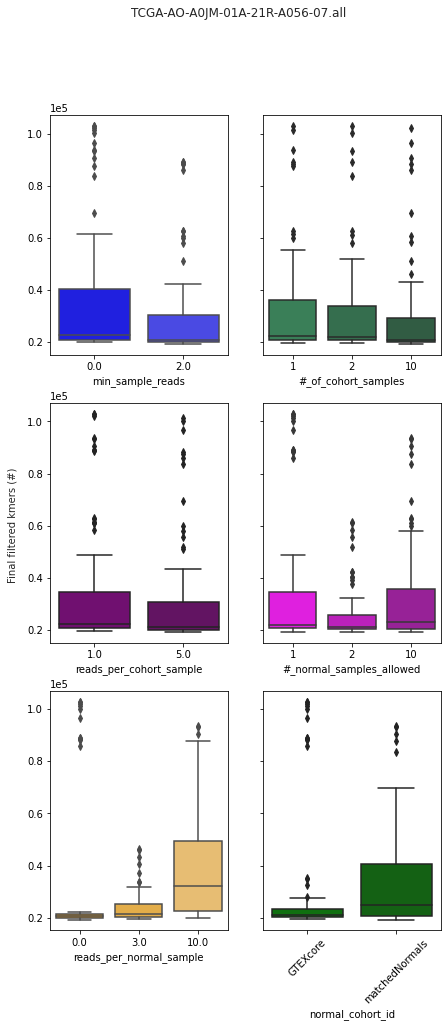

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(7,15), sharey=True)
plot_pos = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for plot_id in np.arange(len(param)):
    #plt.figure(figsize = (2, 4))
    sns.set_style("whitegrid")
    mypalette = sns.color_palette(palettes[plot_id])
    sns.boxplot(ax=axes[plot_pos[plot_id]], x=param[plot_id], y=kmers, 
                data=df, palette = mypalette).set(ylabel=None) 
    plt.ticklabel_format(style='scientific', axis='y',scilimits=(0,0), useMathText=False, useLocale=True)
    if 'id' in param[plot_id]:
        plt.xticks(rotation=45)
#fig.supylabel('Final filtered junction (#)')
fig.suptitle(df.loc[0, 'sample'] , fontsize = 12)
fig.text(0.04, 0.5, 'Final filtered kmers (#)', va='center', rotation='vertical')
plt.savefig('/cluster/work/grlab/projects/projects2020_OHSU/plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07.all.png', bbox_inches='tight', dpi = 300)
plt.show()
    